學習資源：https://www.coursera.org/learn/deep-neural-network

## 應用
* 機器學習是一個迭代的過程，因為在最初無法賦予所有超參數最精確的數值。
  * #layers
  * #hidden units
  * learning rates
  * activation function
  * ...
* 想法→代碼→實驗→結果→改進想法→...，不斷嘗試進而迭代出更好的神經網路。

### Train/dev/test sets

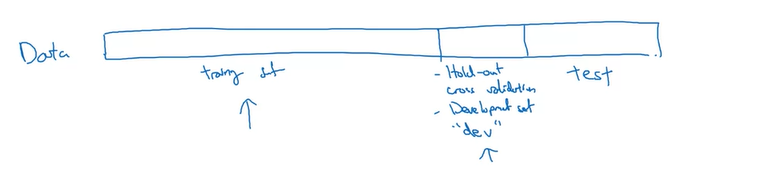
將數據分成訓練(60%)、比對(20%)、測試集(20%)。  
但在現今大數據的前提下，若總數據有100萬個，則比對集與測試集可能都只需要1萬個樣本就夠了(不一定要維持這個比例，60%,20%,20%)。


#### 訓練集與測試集的數據分配不相同
* 測試集用網路中抓的圖片，大多是像素高、高分辨率的圖片。
* 比對集與測試集是使用用戶上傳的照片，可能相對比較模糊，因為使用較不專業的器材且拍攝的較為隨意。
* 這會造成兩種不同的分布。
* 確保兩者均勻分配算法才可以進步更快。


### Bias / Variance
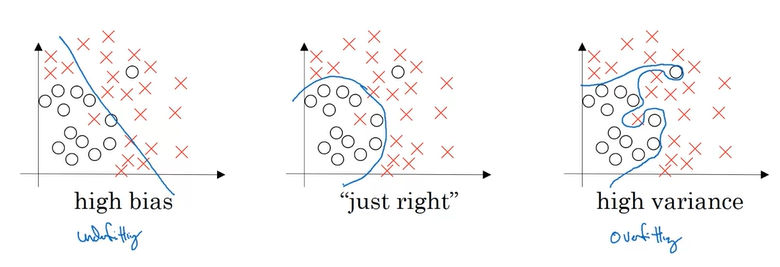  




* 高偏差：在交叉比對集上表現良好，在訓練集上表現不佳。
* 高方差：在訓練集上表現良好，在交叉比對集上表現不佳。

ex.基準誤差=0.5%  
高偏差:=訓練集誤差=15%, 交叉比對集誤差=16%  
高方差:=訓練集誤差=1%, 交叉比對集誤差=11%  
高偏差&高方差:=訓練集誤差=15%, 交叉比對集誤差=30%  

**高偏差&高方差**  
誤差高表示據高偏差，但同時只對中間的樣本過度擬和，展現出高方差的特性
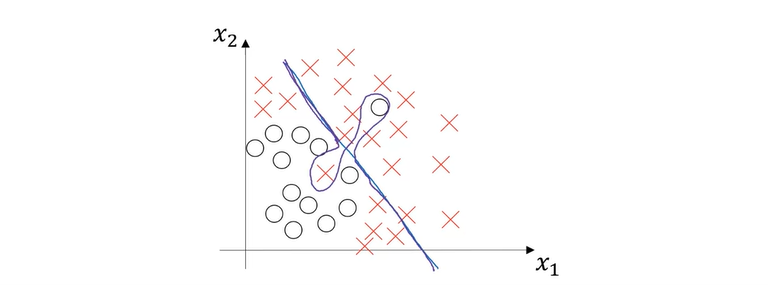


訓練好神經網路後，透過模型在訓練集上的表現，確認這個算法是否有高偏差?  
若有，可以嘗試設計新的神經網路(ex.增加隱藏層、神經元數量)、梯度下降運行更多次、更改神經網路架構。  

高方差?  
若有，獲取更多數據再次進行訓練、若無法獲得更多數據，嘗試正則化、更改神經網路架構。 

直到成功訓練出低偏差、低方差的模型。

* 想改善高方差問題，使用正則化可防止過擬和。  
### 正則化(Regularization)


**邏輯回歸**中最小化代價函數$\mathop{min}\limits_{w,b}J(w,b)$  
$J(w,b)=\frac{1}{m}\sum\limits^{m}_{i=1}L(\hat{y}^{(i)}, y^{(i)})+\frac{\lambda}{2m}||w||^2_2\textcolor{red}{(+\frac{\lambda}{2m}b^2)}$, $w\in R^{n_x}$是x維的向量參數, $b\in R$是一個實數, $\lambda$是正則化參數。  

**L2 正則化**$\rightarrow$ $||w||^2_2=\sum\limits^{n_x}_{j=1}w_j^2=w^Tw=(w的轉置)$x$(w)$ 

上方公式中的<font color="red">紅色部分</font>通常會省略掉，因為$w$通常是一個高維的參數向量(尤其在高方差發生時，因為有許多w，因此無法完美的擬和所有參數)，而b只是單個數字，幾乎所有參數都在w中，因此加上公式中紅色部分並不會有太大的幫助。  

L2 正則化是最常見的正則化方式。  

**L1 正則化**$\rightarrow$ $\frac{\lambda}{\textcolor{red}{2}m}\sum\limits^{n_x}_{i=1}|w_j|=\frac{\lambda}{\textcolor{red}{2}m}||w||_1$  
使用L1 正則化，$w$會變得稀疏($w$矢量中會有很多0，可使占用的空間變少，但對改善參數用處不大)


**神經網路**中代價函數$J(w^{[1]},b^{[1]},...,w^{[L]},b^{[L]})=\frac{1}{m}\sum\limits^{m}_{i=1}L(\hat{y}^{(i)}, y^{(i)})+\frac{\lambda}{2m}\sum\limits^{L}_{l=1}||w^{[l]}||^2$  
$||w^{[l]}||^2=\sum\limits^{n^{[l]}}_{i=1}\sum\limits^{n^{[l-1]}}_{j=1}(w^{[l]}_{i,j})^2$  
$i=1\sim n^{[l]}$  
$j=1\sim n^{[l-1]}$  

梯度下降，透過反向傳播得到$J$對於$w$的偏導數  
$dw^{[l]}=\frac{∂J}{∂w^{[l]}}$  
$\rightarrow dw^{[l]}=\frac{∂J}{∂w^{[l]}}\textcolor{red}{+\frac{\lambda}{m}w^{[l]}}$  
$\rightarrow w^{[l]}:=w^{[l]}-\alpha dw^{[l]}$  


#### 隨機失活正則化(dropout regularization)

對於 dropout，需要遍歷網路的每一層並設定消除神經網路中節點的機率。假設對於每一層的節點，有0.5的機會保留，有0.5的機會刪除，隨機選出要刪除的節點後，清除節點上所有正在進行的運算，再做反向傳播訓練→隨機編碼每個節點的去留，以獲得一個更小的神經網路，減緩過擬和的情況。  
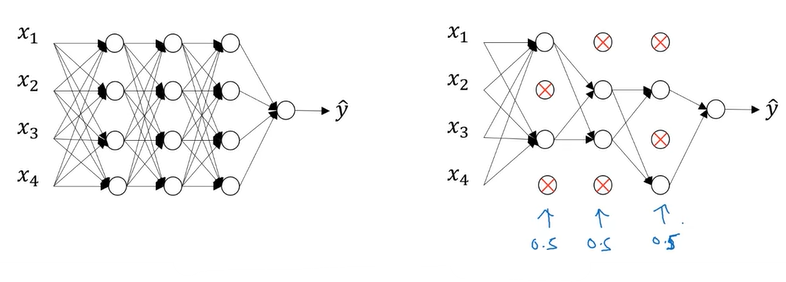  



#### Implement - 反向隨機失活(Inverted dropout)
假設現在在第三層($l=3$)：  
keep-prob=1，代表保留所有神經元(無任何改變)。  

每次迭代都隨機清除不同的隱藏單元。  
d3決定了此次被清零的神經元。  
反向隨機失活藉由除以keep-prob以確保a3的期望值不變，若沒有除以keep-prob則在測試過程中求平均值會變的越來越複雜。

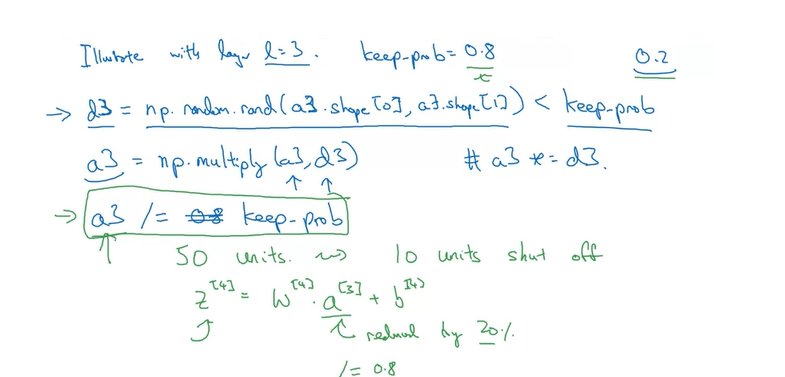

#### Understanding Dropout

$w^{[1]}=7$x$3$, $w^{[2]}=7$x$7$, $w^{[3]}=3$x$7$, 
$w^{[2]}$擁有最多的參數，對於擁有很多參數的圖層會將keep-prop設的更小(視為高正則化)

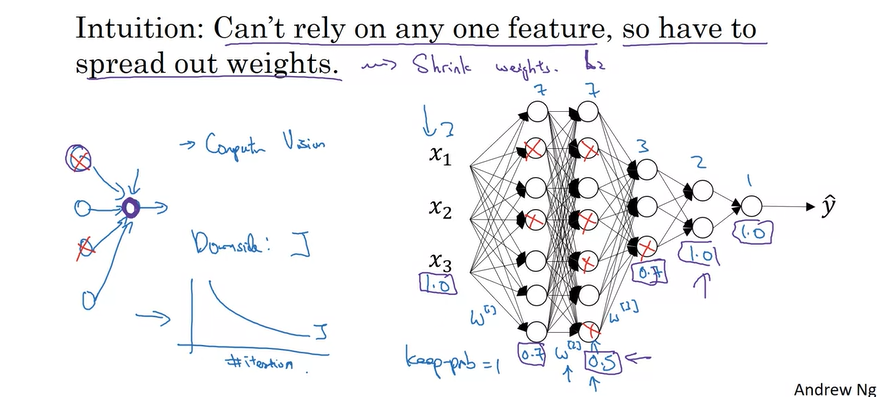

**缺點:**  
* 每次迭代都不再明確定義成本函數J，因此若要檢查成本函數是否有在持續下降，需要先將keep-prop設為1(關掉)

#### 其他正則化方法

**擴增數據集**  

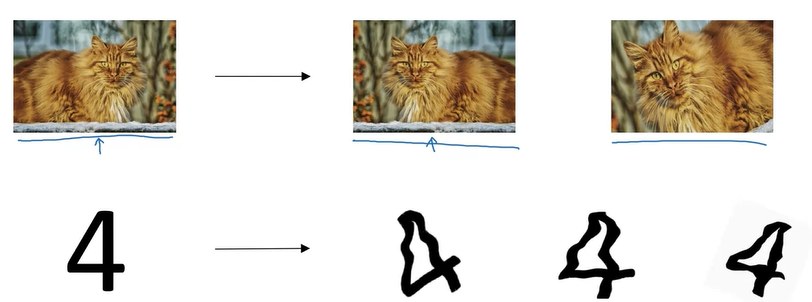

**提早結束迭代(Early stopping)**

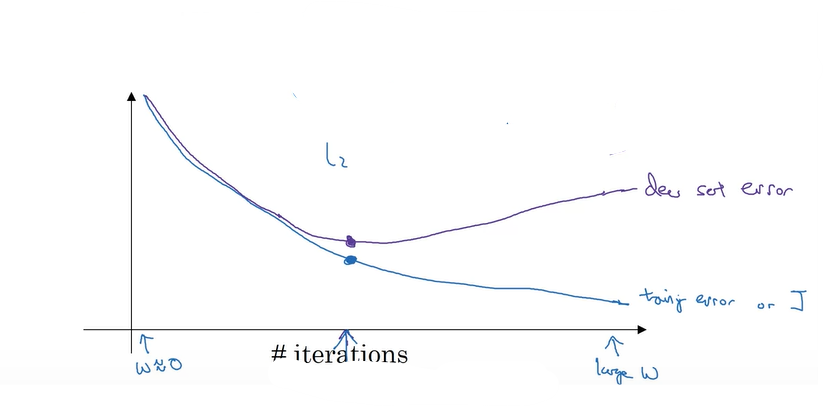

#### 為什麼正則化可以降低過擬和?
* 將$\lambda$設為很大的值，權重矩陣$w^{[l]}\approx0$，可視為將很多隱藏單元中的權重設置的過於接近0，而使的那些隱藏單元的影響被消除(簡化神經網路，變的越來越接近邏輯回歸)

### 正規化(Normalizing Inputs)

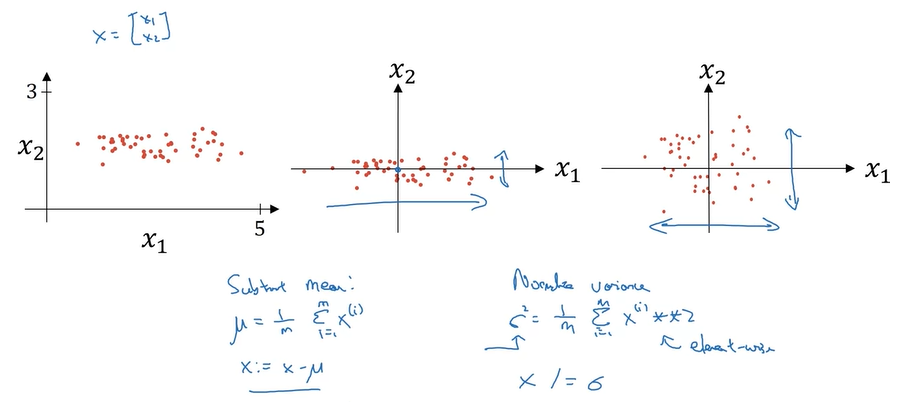



* 第一步：減去均值或歸零  
  Subtract mean:$\mu=\frac{1}{m}\sum\limits^{m}_{i=1}x^{(i)}$　　$x:=x-\mu$  
  $x_1$的方差大於$x_2$
* 第二步：  
  normalize variance:$\sigma^2=\frac{1}{m}\sum^{m}_{i=1}x^{(i)}**2$(因為$x^{(i)}$已經減去均值，因此$x^{(i)}**2$就是方差，$\sigma$是包含每個特徵方差的向量)  
  $x=x/\sigma$，使得$x_1,x_2$的方差都等於1  


#### 為什麼需要將輸入正規化?
若沒有使用正規化，且繪製的圖像下方一樣分布的不均勻，則可能需要使用非常小的學習率才可以避免震盪達到最低點。  
而正則化後繪製出的圖會非常平均。
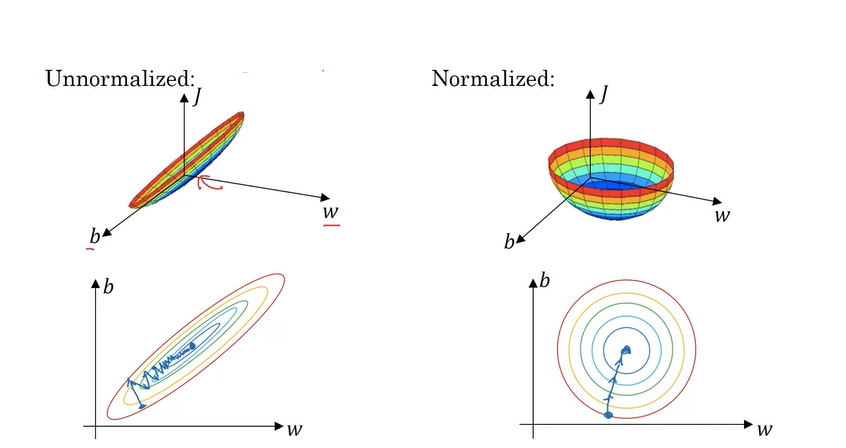

### 梯度下降

#### 梯度的消失或爆炸
* 梯度下降的過程中損失函數的導數(斜率)可能變得非常小或者非常大。

假設有一個如下方的神經網路，為了簡化，每層只有2個神經元  
激活函是$g(z)=z$，線性激活函數，$b^{[l]}=0$  
此情況下，$\hat{y}=w^{[L]}w^{[L-1]}w^{[L-2]}...w^{[2]}w^{[1]}x+b\textcolor{lightgray}{(b=0)}$  
$z^{[1]}=w^{[1]}x+\textcolor{lightgray}{0}$  
$a^{[1]}=g(z^{[1]})=z^{[1]}$  
$a^{[2]}=g(z^{[2]})=g(w^{[2]}a^{[1]})=z^{[2]}$  

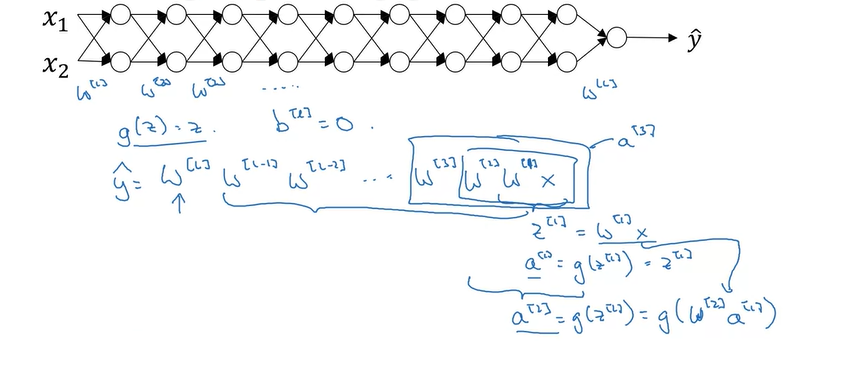

假設每個權重矩陣$w^{[l]}$比單位矩陣再稍微大一點  
$w^{[l]}=\left[ \begin{array}{ccc}
    1.5 & 0 \\
    0 & 1.5  
\end{array} \right]$  但忽略最後維度不一樣的$w^{[L]}$  
$\hat{y}=w^{[L]}\left[ \begin{array}{ccc}
    1.5 & 0 \\
    0 & 1.5  
\end{array} \right]^{L-1}x \rightarrow 1.5^{L-1}x$若這是一個很深的網路$L$很大，啟動值會爆炸(指數上增)$\rightarrow$$\hat{y}$會非常大


$w^{[l]}=\left[ \begin{array}{ccc}
    0.5 & 0 \\
    0 & 0.5  
\end{array} \right]$  但忽略最後維度不一樣的$w^{[L]}$  
$\hat{y}=w^{[L]}\left[ \begin{array}{ccc}
    0.5 & 0 \\
    0 & 0.5  
\end{array} \right]^{L-1}x \rightarrow 0.5^{L-1}x$若這是一個很深的網路，$L$很大，則啟動值會隨指數減少

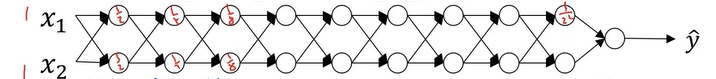  

<font color="red">**解決方法是仔細選擇初始權重**</font>

### 初始化權重
#### 單神經網路
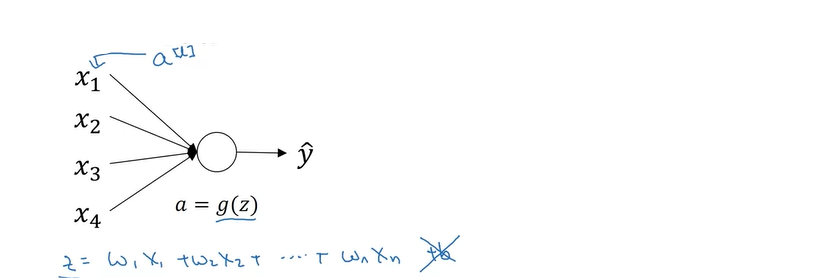
$z=w_1x_1+w_2x_2+...+w_nx_n$  
為了讓$z$不會膨脹，也不會太小。  
最大的$n$對應最小的$w_i$，因為$z$是$w_ix_i$的和，需要每個項目都小一點，可以將$w_i變異成\frac{1}{n}, n$是輸入特徵的數目  
$\rightarrow w^{[l]}=np.random.randn(shape)*np.sqrt(\frac{1}{n^{[l-1]}})$,$n^{[l-1]}$為輸入到第$l$層中的單元數(特徵)  

若使用ReLU$\rightarrow w^{[l]}=np.random.randn(shape)*np.sqrt(\frac{\textcolor{red}{2}}{n^{[l-1]}})$；$g(z)=ReLU(z)$  

若使用tanh$\rightarrow w^{[l]}=np.random.randn(shape)*\textcolor{red}{\sqrt{\frac{1}{n^{[l-1]}}}}$；$g(z)=tanh(z)$  
或者$\rightarrow w^{[l]}=np.random.randn(shape)*\textcolor{red}{\sqrt{\frac{2}{n^{[l-1]}+n^{[l]}}}}$；$g(z)=tanh(z)$  

此種設置$w$的方法會使的$w$不會比1大太多，可避免梯度消失或過快膨脹。  



### 梯度下降檢驗
$f(\theta)=\theta^3　\rightarrow　g(\theta)=3\theta^2$  
雙側$\frac{f(\theta+\varepsilon)-f(\theta-\varepsilon)}{2\varepsilon}$取值計算後的誤差是0.0001，單側(小三角形)$\frac{f(\theta+\varepsilon)-f(\theta)}{\varepsilon}$計算後的誤差是0.003  
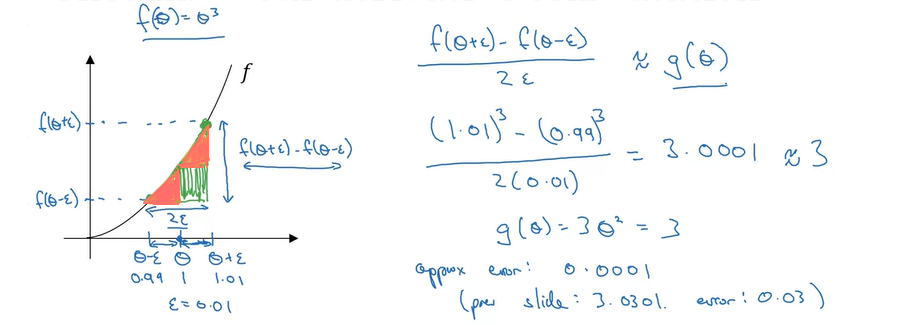


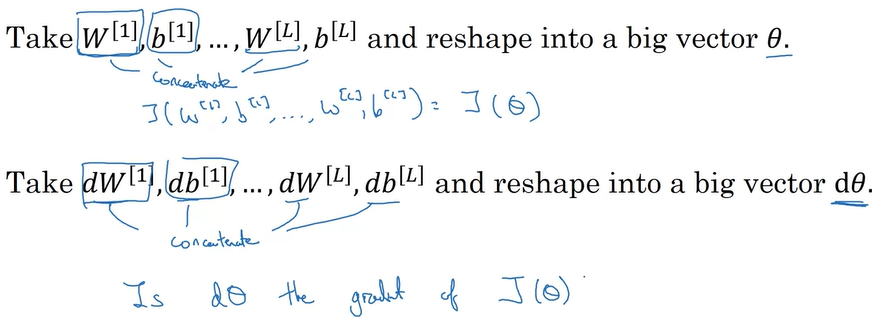  

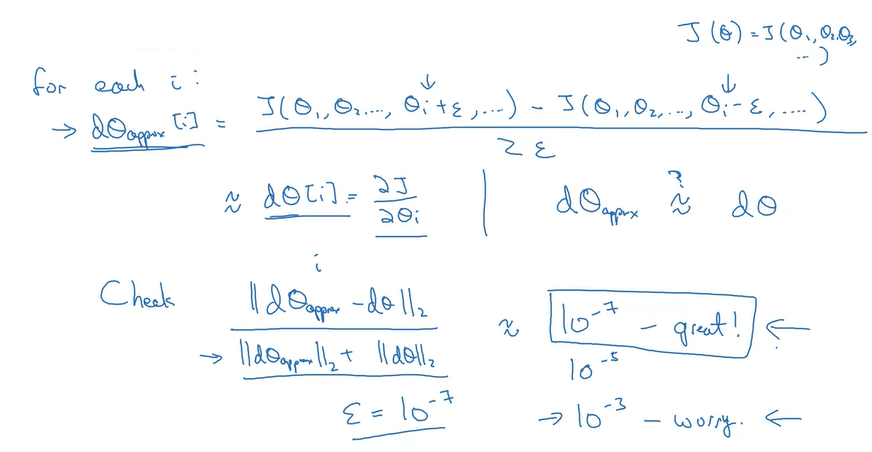


* 不要在訓練中使用梯度檢查，只在debug時使用，因為計算$d\theta_{approx}[i]$以確保接近$d\theta$的過程很慢
* 如果算法在梯度檢查時發現錯誤，需要去檢查他的組成，ex.查看$d\theta_{approx}[i]$跟$d\theta$間差距最大的$i$，以便推測出bug出現在哪層中
* 若使用了正則化，記得在梯度中加上正則項
* 梯度檢驗不能與隨機失活(dropout)一起使用，因為每次都清除隨機的神經元，因此不存在容易計算的代價函數，可先將keep-prob=1，再使用梯度檢查
* 在隨機初始化的時候運行梯度檢查

## 優化演算法

### 小批量梯度下降法(Mini-batch Gradient Descent)